Referencing source: https://www.youtube.com/watch?v=rdfbcdP75KI&list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [4]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Explore the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


#### Drop unusable columns

In [7]:
# drop society, balcony, area_type 
df_new = df.drop(["area_type","society", "balcony"], axis="columns")
df_new.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


#### Checking and imputing Null Values

In [8]:
df_new.isnull().sum()
# df_new.shape

availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [9]:
df_new = df_new.dropna()
df_new.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df_new.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [11]:
# check on size
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# BHK and Bedroroms are the same
# only take the first digit and rename the column
df_new['size'] = df_new['size'].apply(lambda x: x.split(" ")[0])
df_new.rename(columns={"size": "bedroom_num"}, inplace=True)
df_new.head()

,availability,location,bedroom_num,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3,1521,3.0,95.00
4,Ready To Move,Kothanur,2,1200,2.0,51.00


In [13]:
# check on availability
df_new["availability"].value_counts()
df_new['availability'] = df_new['availability'].apply(lambda x: "Ready To Move" if x =="Ready To Move" else "Other")
type(df_new['availability'])

pandas.core.series.Series

In [14]:
df_new['availability'].value_counts()
df_new.head()

,availability,location,bedroom_num,total_sqft,bath,price
0,Other,Electronic City Phase II,2,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3,1521,3.0,95.00
4,Ready To Move,Kothanur,2,1200,2.0,51.00


In [15]:
df_new['bedroom_num'] = df_new['bedroom_num'].astype(int)

In [16]:
# check the total_sqft into int

df_new["total_sqft"]

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object

In [17]:
# Extract all non-float value in total_sqft
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
# function to find the average if "-" and drop other non-number value
def avg_sqft(x):
    lst = x.split("-")
    if len(lst) == 2:
        return (float(lst[0])+float(lst[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
df_new["total_sqft"] = df_new["total_sqft"].apply(avg_sqft)

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  13246 non-null  object 
 1   location      13246 non-null  object 
 2   bedroom_num   13246 non-null  int64  
 3   total_sqft    13200 non-null  float64
 4   bath          13246 non-null  float64
 5   price         13246 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


In [21]:
# Check on Location
df_location_stat = df_new['location'].value_counts()
# any location with less than 10 counts => other location

df_location_less_than_10 = df_location_stat[df_location_stat<=10]

df_new["location"] = df_new["location"].apply(lambda x: "other" if x in df_location_less_than_10 else x)
df_new[df_new["location"]=="other"]


,availability,location,bedroom_num,total_sqft,bath,price
9,Ready To Move,other,6,1020.0,6.0,370.00
18,Ready To Move,other,3,2770.0,4.0,290.00
19,Ready To Move,other,2,1100.0,2.0,48.00
24,Other,other,1,510.0,1.0,25.25
25,Other,other,3,1250.0,3.0,56.00
...,...,...,...,...,...,...
13291,Other,other,1,812.0,1.0,26.00
13292,Other,other,3,1440.0,2.0,63.93
13302,Ready To Move,other,2,1075.0,2.0,48.00
13306,Ready To Move,other,4,1200.0,5.0,325.00


In [22]:
len(df_new.location.unique())

242

In [23]:
# Add price per square foot

df_new["price_per_sqft"] = df_new["price"]*100000/df_new["total_sqft"]
df_new.head()

,availability,location,bedroom_num,total_sqft,bath,price,price_per_sqft
0,Other,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Ready To Move,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Ready To Move,Kothanur,2,1200.0,2.0,51.00,4250.000000


### Outlier Removal 

Domain knowledge 
OR 
standard deviation


Through domain knowledge, assuming typical square foot per room is 300
Eliminate house with sqft/room <300

In [24]:
# Eliminate house with sqft/room <300
df_no_outlier = df_new[~(df_new.total_sqft/df_new.bedroom_num < 300)]
df_new.shape

(13246, 7)

In [25]:
df_no_outlier.shape

(12502, 7)

In [26]:
# eliminate 
df_no_outlier.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [27]:
def remove_pps_outlier(df):
    final_df = pd.DataFrame()
    for location, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        new_df = subdf[(subdf.price_per_sqft <= (m+sd)) & (subdf.price_per_sqft > (m-sd))]
        final_df = pd.concat([final_df, new_df], ignore_index=True)
#         print(location)
    return final_df
        
df_no_outlier2 = remove_pps_outlier(df_no_outlier)
df_no_outlier2.shape

(10244, 7)

In [28]:
df_no_outlier2.bedroom_num.unique()

array([ 3,  2,  4,  5,  1,  6,  8,  7,  9, 10, 11, 16, 13])

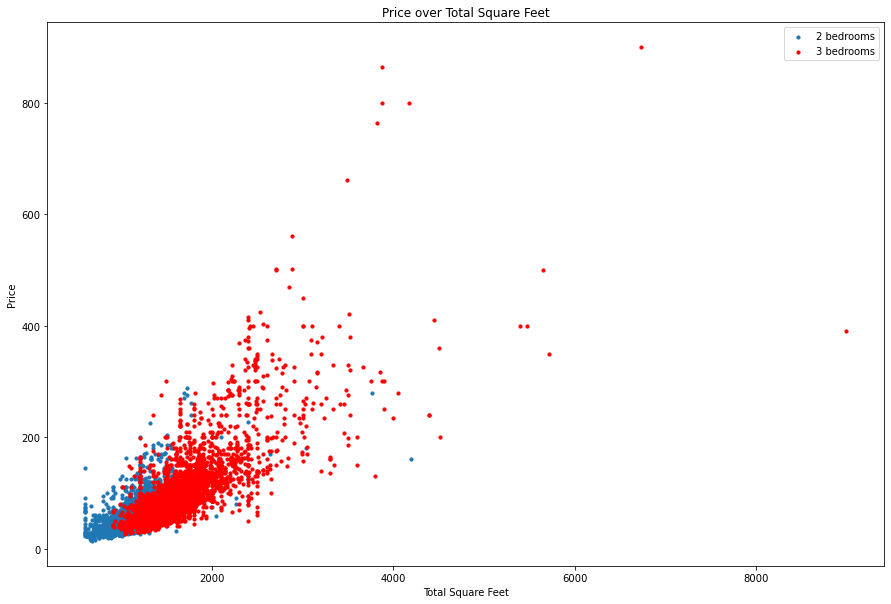

In [29]:

def plot_scatter(df):
    matplotlib.rcParams['figure.figsize'] = (15,10)
    bedroom2 = df.bedroom_num==2
    bedroom3 = df.bedroom_num==3
    plt.scatter(df.total_sqft[bedroom2], df.price[bedroom2], s=10, label="2 bedrooms")
    plt.scatter(df.total_sqft[bedroom3], df.price[bedroom3], s=10 , color="red", label="3 bedrooms")
    plt.legend()
    plt.title("Price over Total Square Feet")
    plt.xlabel("Total Square Feet")
    plt.ylabel("Price")

plot_scatter(df_no_outlier2)

In [30]:
df_no_outlier2.shape

(10244, 7)

In [31]:
def remove_bedroom_outlier(df):
    exclude_indices = np.array([])
    for location, df_location in df.groupby("location"):
        bedroom_stat = {}
        for bedroom, df_bedroom in df_location.groupby("bedroom_num"):
            bedroom_stat[bedroom] = {
                "mean": np.mean(df_bedroom["price_per_sqft"]),
                "std": np.std(df_bedroom["price_per_sqft"]),
                "count": df_bedroom.shape[0]
            }
        for bedroom, df_bedroom in df_location.groupby("bedroom_num"):
            stat = bedroom_stat.get(bedroom-1)
            if stat and stat['count'] > 5:
                exclude_indices = np.append(exclude_indices, df_bedroom[df_bedroom.price_per_sqft<(stat['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df_no_outlier3 = remove_bedroom_outlier(df_no_outlier2)
df_no_outlier3.shape

(7342, 7)

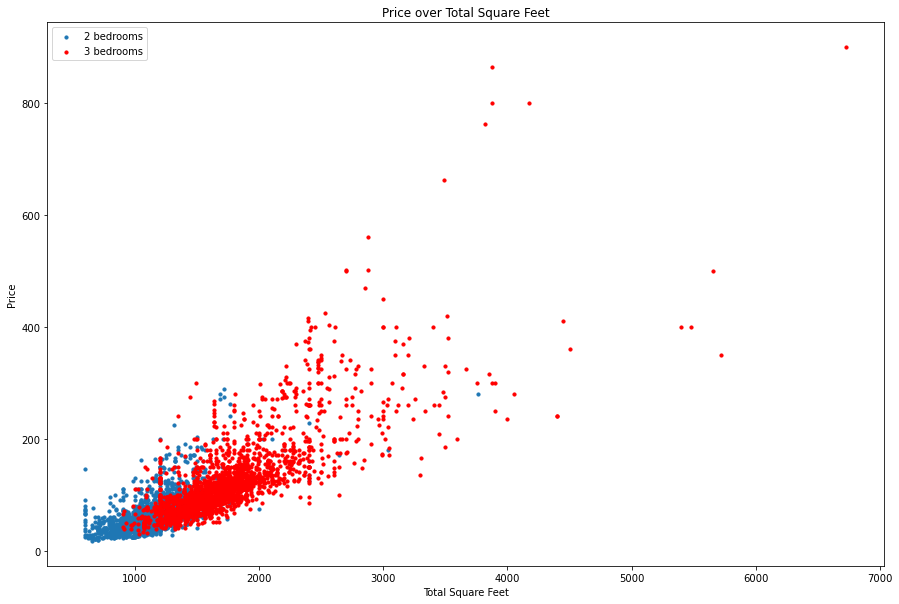

In [32]:
plot_scatter(df_no_outlier3)

In [33]:
# For bathroom

df_no_outlier3.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [34]:
df_no_outlier3[df_no_outlier3.bath>10]

,availability,location,bedroom_num,total_sqft,bath,price,price_per_sqft
5271,Ready To Move,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000
8481,Ready To Move,other,10,12000.0,12.0,525.0,4375.000000
8570,Ready To Move,other,16,10000.0,16.0,550.0,5500.000000
9309,Ready To Move,other,11,6000.0,12.0,150.0,2500.000000
9641,Ready To Move,other,13,5425.0,13.0,275.0,5069.124424


In [35]:
# If bath > bedroom_num +2 => drop

df_no_outlier4 = df_no_outlier3[df_no_outlier3.bath-df_no_outlier3.bedroom_num<2]        

In [36]:
df_no_outlier4.shape

(7264, 7)

In [37]:
df_no_outlier4 

,availability,location,bedroom_num,total_sqft,bath,price,price_per_sqft
1,Ready To Move,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Ready To Move,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Ready To Move,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Ready To Move,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509
5,Ready To Move,Devarachikkanahalli,2,947.0,2.0,43.0,4540.654699
...,...,...,...,...,...,...,...
10235,Other,other,2,1200.0,2.0,70.0,5833.333333
10236,Ready To Move,other,1,1800.0,1.0,200.0,11111.111111
10239,Ready To Move,other,2,1353.0,2.0,110.0,8130.081301
10240,Other,other,1,812.0,1.0,26.0,3201.970443


In [38]:
df_final = df_no_outlier4.drop(["availability", "price_per_sqft"], axis='columns')

In [39]:
df_final

,location,bedroom_num,total_sqft,bath,price
1,Devarachikkanahalli,2,1250.0,2.0,40.0
2,Devarachikkanahalli,2,1200.0,2.0,83.0
3,Devarachikkanahalli,2,1170.0,2.0,40.0
4,Devarachikkanahalli,3,1425.0,2.0,65.0
5,Devarachikkanahalli,2,947.0,2.0,43.0
...,...,...,...,...,...
10235,other,2,1200.0,2.0,70.0
10236,other,1,1800.0,1.0,200.0
10239,other,2,1353.0,2.0,110.0
10240,other,1,812.0,1.0,26.0


In [40]:
# One Hot encoding
dummies = pd.get_dummies(df_final.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df_final = pd.concat([df_final, dummies.drop('other', axis='columns')], axis='columns')

In [42]:
df_final.drop("location", axis="columns", inplace=True)

In [43]:
df_final

,bedroom_num,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,83.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,65.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947.0,2.0,43.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,2,1200.0,2.0,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1,1800.0,1.0,200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,2,1353.0,2.0,110.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1,812.0,1.0,26.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [44]:
X = df_final.drop("price", axis="columns")
y = df_final.price

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
X_train
y_train

5462     68.0
3542     62.0
4565     85.0
1123    118.0
272      88.0
        ...  
1059     46.0
6461     66.5
4906    250.0
275      90.0
6421     60.0
Name: price, Length: 5811, dtype: float64

In [46]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8834276559509546

In [47]:
# 5-fold Cross Validation
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score

kfold = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cv = cross_val_score(LinearRegression(), X_train, y_train, cv=kfold)


In [48]:
# Cross Validate 3 models: Linear Regression, Lasso, Decision Tree Regressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Find the base model with k fold cross validation through GridSerachCV
from sklearn.model_selection import GridSearchCV
models = {
    "Linear_Regression": {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    "Lasso": {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    "Decision_Tree": {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
        }
    }
}
scores = []
kfold = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for algo_name, config in models.items():
    gs = GridSearchCV(config["model"], config["params"], cv=kfold, return_train_score=False)
    gs.fit(X_train, y_train)
    scores.append({
        "model": algo_name,
        'best_score': gs.best_score_,
        "best_params": gs.best_params_
    })

print(scores)

[{'model': 'Linear_Regression', 'best_score': 0.8218897821360626, 'best_params': {'normalize': False}}, {'model': 'Lasso', 'best_score': 0.6780976139795325, 'best_params': {'alpha': 1, 'selection': 'random'}}, {'model': 'Decision_Tree', 'best_score': 0.7363680530918917, 'best_params': {'criterion': 'mse', 'splitter': 'random'}}]


### Results:

'model': 'Linear_Regression', 'best_score': 0.8490972704674558, 'best_params': {'normalize': False}},

'model': 'Lasso', 'best_score': 0.7046414906306901, 'best_params': {'alpha': 1, 'selection': 'cyclic'}}, 

'model': 'Decision_Tree', 'best_score': 0.7451941357451114, 'best_params': {'criterion': 'friedman_mse', 'splitter': 'best'}}]



### From above, we found that Linear Regression has the highest score, so we will use Linear Regression as our base model.

In [49]:
# Write a function to predict price

# np.where(df.columns...)[0][0] shows the column position
# sample code: print(np.where(X.columns=="1st Block Jayanagar")[0][0])

def predict_price(location, total_sqft, bath, bedroom_num):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = bedroom_num
    x[1] = total_sqft
    x[2] = bath
    
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr.predict([x])[0]

In [50]:
# Example
predict_price("1st Block Jayanagar", 2, 1250, 2)

1979.4495071285974